LaTeX Markdown:

# Notebook Imports and Packages

In [77]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # colour map!

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function

# $$f(x) = x^2 + x + 1$$

Generating data with numpy:

In [2]:
 def f(x):
        return x**2 + x + 1

In [3]:
# Make data:
x_1 = np.linspace(start=-3, stop=3, num=500)

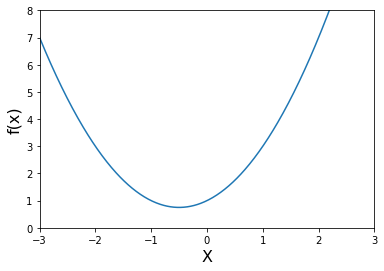

In [4]:
# Plot:
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

# Slope & Derivatives:
Challenge: create a python function for the derivative of $f(x)$ called df(x)

In [5]:
def df(x):
    return 2*x + 1

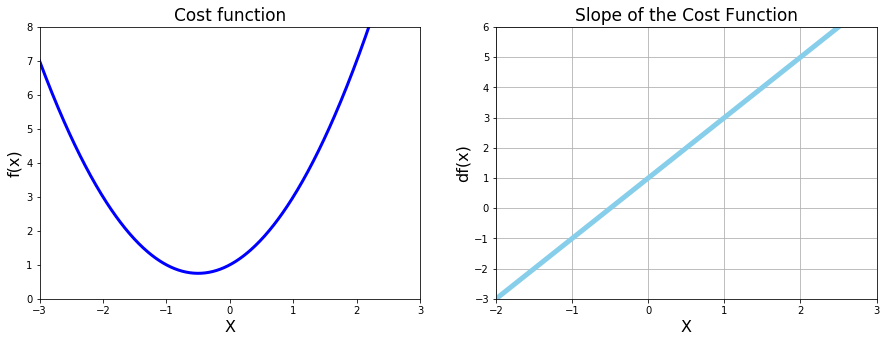

In [6]:
# Plot function and derivative side-by-side:
plt.figure(figsize=[15,5])

# Chart 1: The Cost Function:
plt.subplot(1, 2, 1)

plt.xlim(-3,3)
plt.ylim(0,8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# Chart 2: Derivative:
plt.subplot(1,2,2)

plt.xlim(-2,3)
plt.ylim(-3,6)
plt.grid()
plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)


plt.show()

# Python Loops & Gradient Descent:

Loops in Python:

In [7]:
# Python For loop:
for n in range(5):
    print('Hello World', n)
print('End of For loop')

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4
End of For loop


In [8]:
# Python While loop:
counter =  0
while counter < 7:
    print('Counting...', counter)
    counter = counter + 1
print('Ready or not here I come!')

Counting... 0
Counting... 1
Counting... 2
Counting... 3
Counting... 4
Counting... 5
Counting... 6
Ready or not here I come!


Gradient Descent:

In [9]:
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size  = abs(new_x - previous_x)
#     print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
        
    if step_size < precision:
        print('Loop ran this many times:', n)
        break
    
print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


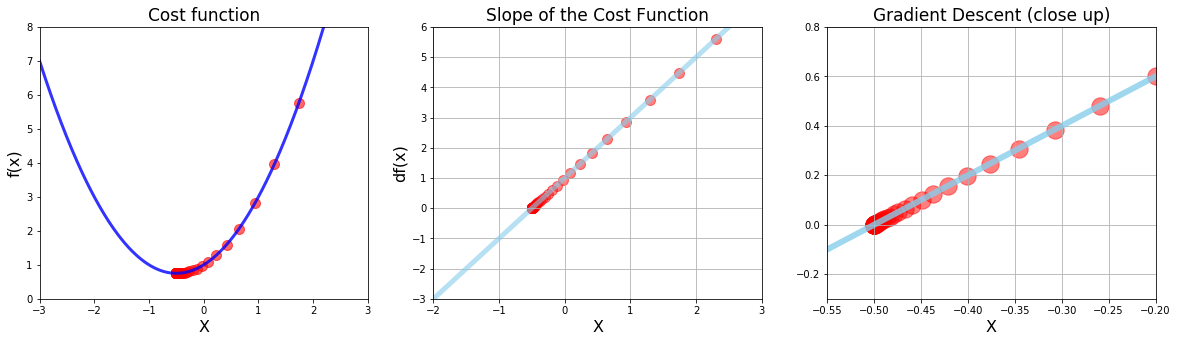

In [10]:
# Superimpose the gradient descent calculations on the plot:
plt.figure(figsize=[20,5])

# Chart 1: The Cost Function:
plt.subplot(1, 3, 1)

plt.xlim(-3,3)
plt.ylim(0,8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# Chart 2: Derivative:
plt.subplot(1,3,2)

plt.xlim(-2,3)
plt.ylim(-3,6)
plt.grid()
plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# Chart 3: Derivative (closeup):
plt.subplot(1,3,3)

plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)
plt.grid()
plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.5)

plt.show()

Python - Advanced Functions and the Pitfalls of Optimisation - Part 1:

# Example 2 - Multiple Minima vs. Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [11]:
# Make some data:
x_2 = np.linspace(-2, 2, 1000)

# Challenge: Write the g(x) function and the dg(x) function in Python:
def g(x):
    return x**4 - 4*x**2 + 5
    
def dg(x):
    return 4*x**3 - 8*x

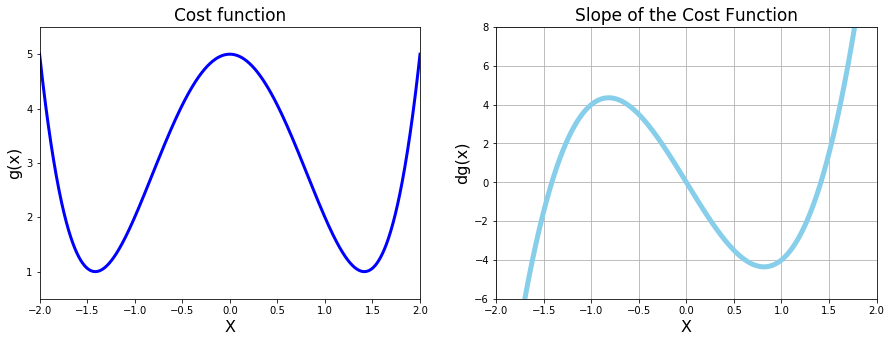

In [12]:
# Plot function and derivative side-by-side:
plt.figure(figsize=[15,5])

# Chart 1: The Cost Function:
plt.subplot(1, 2, 1)

plt.xlim(-2,2)
plt.ylim(0.5,5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)

# Chart 2: Derivative:
plt.subplot(1,2,2)

plt.xlim(-2,2)
plt.ylim(-6,8)
plt.grid()
plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)


plt.show()

## Gradient Descent as a Python Function

In [13]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    # ctrl + ] - This moves selected sections to indented positions:
    
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size  = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break

    return new_x, x_list, slope_list

In [14]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [15]:
#cell above explained:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5, multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4137636556157256
Number of steps: 56


In [16]:
#cell above but using default values in cell above:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps: 34


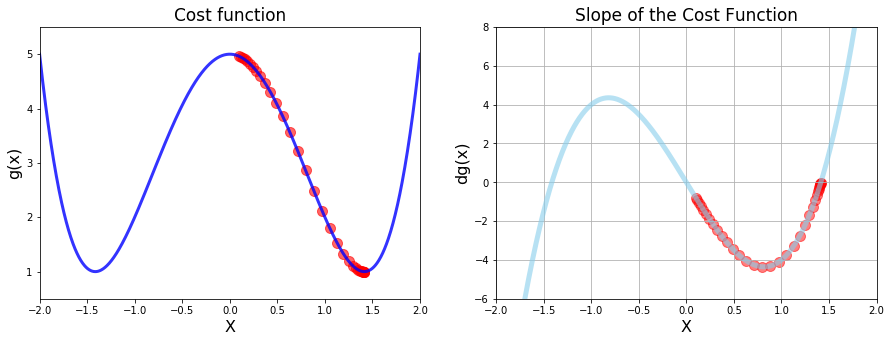

In [17]:
# Calling the gradient descent function:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0.1)

# Plot function, derivative and scatter plot side-by-side:
plt.figure(figsize=[15,5])

# Chart 1: The Cost Function:
plt.subplot(1, 2, 1)

plt.xlim(-2,2)
plt.ylim(0.5,5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# Chart 2: Derivative:
plt.subplot(1,2,2)

plt.xlim(-2,2)
plt.ylim(-6,8)
plt.grid()
plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

Python - Tuples and the Pitfalls of Optimisation - Part2:

# Example 3 - Divergence, Overflow and Python Tuples
## $$h(x) = x^5 -2x^4 + 2$$

In [18]:
# Make data:
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

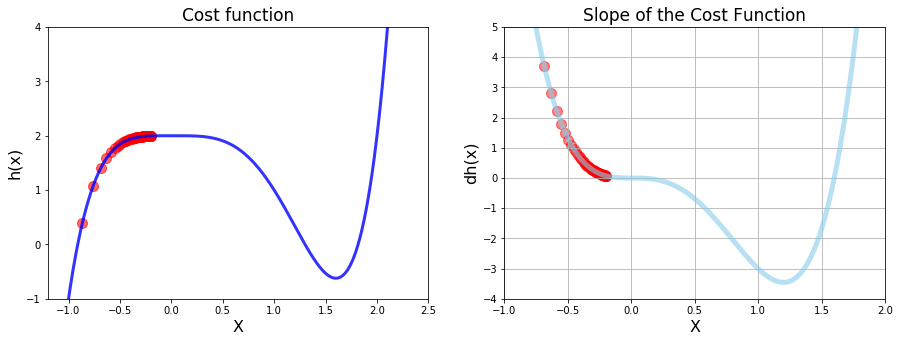

Local min occurs at :  -1.8398461123332792e+24
Cost at this minimum is:  -2.1081790694225687e+121
Number of steps:  72


In [19]:
# Calling the gradient descent function:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess= -0.2, max_iter=71)

# Plot function, derivative and scatter plot side-by-side:
plt.figure(figsize=[15,5])

# Chart 1: The Cost Function:
plt.subplot(1, 2, 1)

plt.xlim(-1.2,2.5)
plt.ylim(-1,4)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# Chart 2: Derivative:
plt.subplot(1,2,2)

plt.xlim(-1,2)
plt.ylim(-4,5)
plt.grid()
plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Local min occurs at : ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(list_x))

In [20]:
import sys
# help(sys)
# sys.version
# type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

## Python Tuples

In [21]:
# Creating a tuple  - tuple packing:
breakfast = 'bacon', 'eggs', 'avocado'
unlucky_numbers = 13, 4, 9, 26, 17

print('I loooove', breakfast[1])
print('My hotel has no ' + str(unlucky_numbers[1]) + 'th floor')
# + concatenation doesn't convert array items to strings - , does.

#List:
not_my_address = 1, 'Infinite Loop', 'Cupertino', 95014
# Tuples are immutable - the following produces an error:
# breakfast[0] = 'sausage'
# as does:
# breakfast[3] = 'sausage'

tuple_with_single_value = 42,
print(tuple_with_single_value)
type(tuple_with_single_value)

#sequence unpacking:
main, side, greens = breakfast
print('Main course is', main)

data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min is', data_tuple[0])
print('Cost at the last x value is', h(data_tuple[0]))
print('Number of steps is', len(data_tuple[1]))

I loooove eggs
My hotel has no 4th floor
(42,)
Main course is bacon
Local min is 1.5989534547394717
Cost at the last x value is -0.6214287992331258
Number of steps is 117


Understanding the learning rate:

# The Learning Rate:

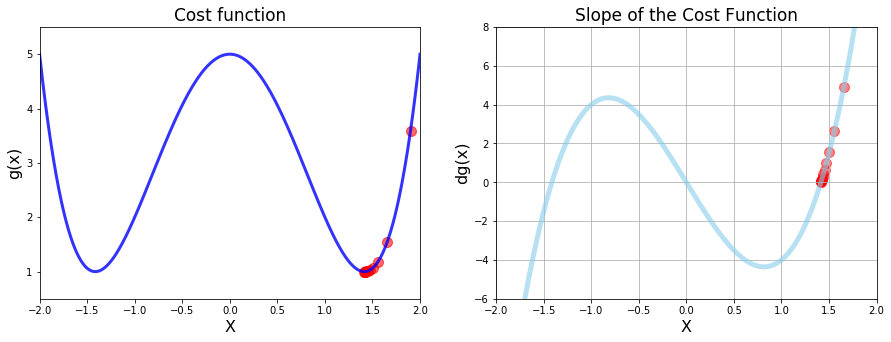

Number of steps is:  14


In [22]:
# Calling the gradient descent function:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9, multiplier=0.02, max_iter=500)

# Plot function, derivative and scatter plot side-by-side:
plt.figure(figsize=[15,5])

# Chart 1: The Cost Function:
plt.subplot(1, 2, 1)

plt.xlim(-2,2)
plt.ylim(0.5,5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# Chart 2: Derivative:
plt.subplot(1,2,2)

plt.xlim(-2,2)
plt.ylim(-6,8)
plt.grid()
plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))

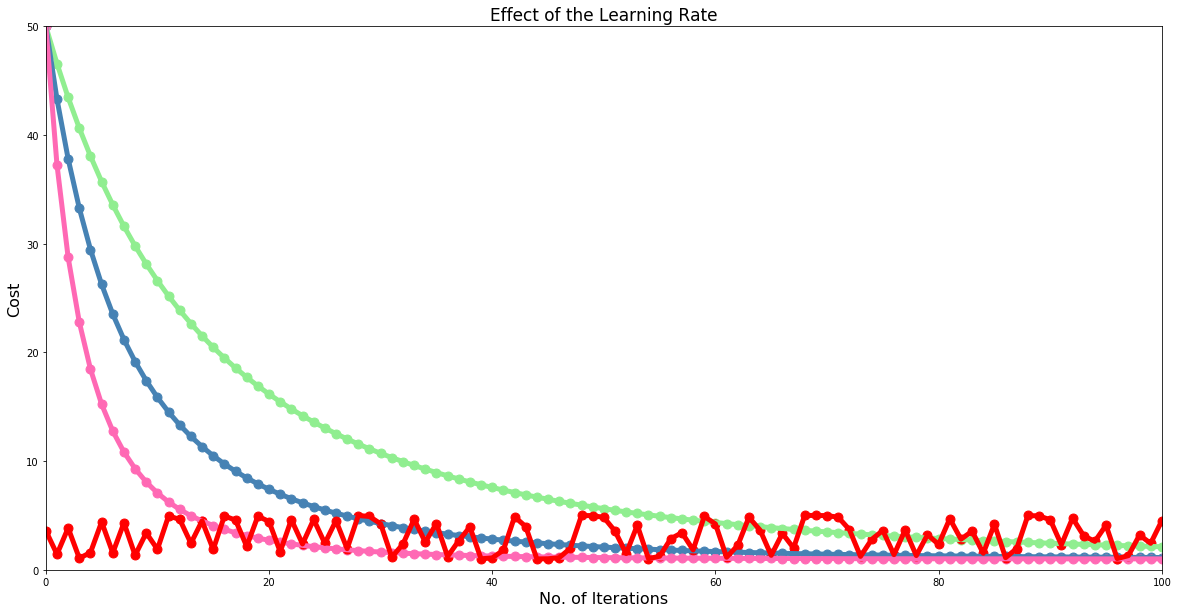

In [23]:
# Run Gradient Descent 3 times:
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess= 3, multiplier=0.0005, precision=0.0001, max_iter=n)

# Challenge: Plot two more learning rates: mid_gamma (0.001) and high_gamma(0.002):
mid_gamma = gradient_descent(derivative_func=dg, initial_guess= 3, multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess= 3, multiplier=0.002, precision=0.0001, max_iter=n)

# 'Insane' Gamma experiment:
insane_gamma = gradient_descent(derivative_func=dg, initial_guess= 1.9, multiplier=0.25, precision=0.0001, max_iter=n)

# Plotting reduction in cost for each iteration:
plt.figure(figsize=[20,10])

plt.xlim(0,n)
plt.ylim(0,50)

plt.title('Effect of the Learning Rate', fontsize=17)
plt.xlabel('No. of Iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)
                             
# Values for our charts:
# 1) Y-Axis Data: convert the lists to numpy arrays:
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])

insane_values = np.array(insane_gamma[1])
                             
# 2) X-Axis Data: create a list from 0 to n+1 (not manually!):
iteration_list = list(range(0, n+1))                             

# Plotting Low Learning Rate:
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

# Plotting Mid Learning Rate:
plt.plot(iteration_list, g(mid_values), color='steelblue', linewidth=5)
plt.scatter(iteration_list, g(mid_values), color='steelblue', s=80)

# Plotting High Learning Rate:
plt.plot(iteration_list, g(high_values), color='hotpink', linewidth=5)
plt.scatter(iteration_list, g(high_values), color='hotpink', s=80)

# Plotting 'Insane' Experimental Learning Rate:
plt.plot(iteration_list, g(insane_values), color='red', linewidth=5)
plt.scatter(iteration_list, g(insane_values), color='red', s=80)

plt.show()                             

HOW TO CREATE 3D CHARTS:

# Example 4 - Data Visualisation with 3D Charts:

## Minimise: $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r +  1}$$ where $r$ is $3^{-x^2 - y^2}$

In [24]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [25]:
# Make our x and y data:
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

type(x_4)

numpy.ndarray

In [26]:
# Using the shape attribute of ndarray:
print('Shape of X array', x_4.shape)

Shape of X array (200,)


In [27]:
# Return coordinate matrices from coordinate vectors:
x_4, y_4 = np.meshgrid(x_4, y_4)
# proof:
print('Array after meshgrid:', x_4.shape)

Array after meshgrid: (200, 200)


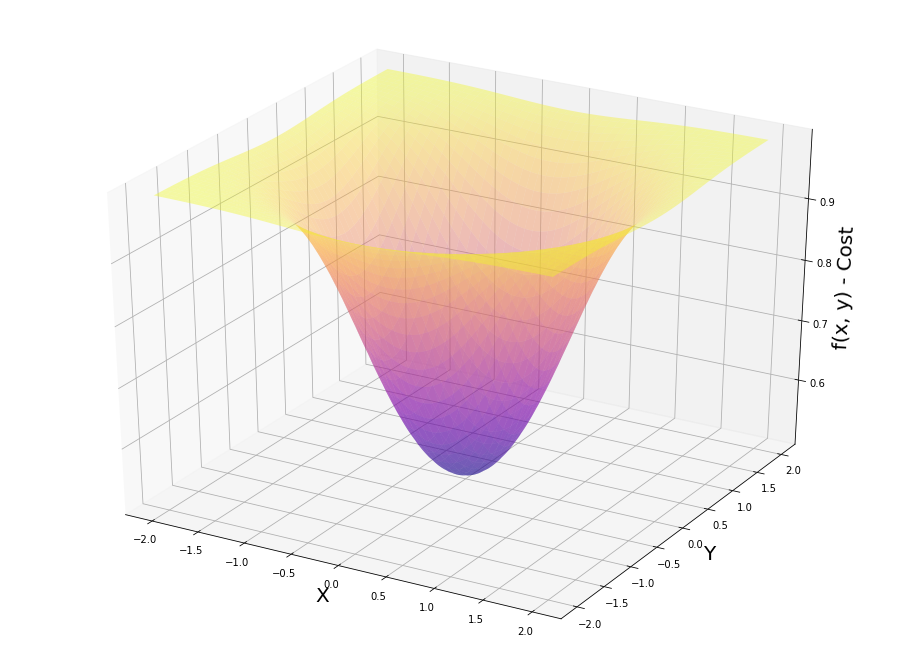

In [28]:
# Generating the 3D Plot:
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.plasma, alpha=0.4)

plt.show()

Understanding Partial Derivatives and How to Use SymPy:

## Partial Derivatives & Symbolic Computation:

## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1 \right) ^2}$$

## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1 \right) ^2}$$

In [29]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ',f(a, b))
f(a, b) # SymPy writes out eqn.:

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)


1/(3**(-x**2 - y**2) + 1)

In [30]:
print('Partial derivative with respect to (wrt) x is: ', diff(f(a, b), a))
diff(f(a, b), a)

Partial derivative with respect to (wrt) x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2


2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2

In [31]:
 # A Python Dictonary -  key:value pairs
print('Value of f(x, y) at x=1.8, y=1.0 is: ', f(a, b).evalf(subs={a:1.8, b:1.0}))

Value of f(x, y) at x=1.8, y=1.0 is:  0.990604794032582


In [32]:
# Challenge: Evaluate Slope wrt x=1.8 and y=1.0:
# Use evalf() to evaluate the partial derivative rather than cost function this time.

print('Value of partial derivative wrt x:', diff(f(a,b), a).evalf(subs={a:1.8, b:1.0}))

Value of partial derivative wrt x: 0.0368089716197505


Implementing Btach Gradient Descent with SymPy:

# Batch Gradient Descent with SymPy:

In [33]:
# Setup:
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial guess

for n in range(max_iter):
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results:
print('Values in gradient array:', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array: [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of: 3.45838599885832e-11
Minimum occurs at y value of: 1.92132555492129e-11
The cost is:  0.500000000000000


Python - Loops and Performance Considerations:

In [34]:
# Partial derivative functions example 4:
def fpx(x, y):
    r  = 3**(-x**2  - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r  = 3**(-x**2  - y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [35]:
# THIS METHOD IS MUCH LESS RESOURCE INTENSIVE & THEREFORE QUICKER THAN USING SYMPY (TWO CELLS ABOVE!):
# Need to  think about optimisation algorithms!
# Setup:
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results:
print('Values in gradient array:', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array: [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y value of: 1.9213255549212797e-11
The cost is:  0.5


Reshaping and Slicing N-Dimensional Arrays: & Concatenating numpy arrays:

## Graphing 3D Gradient Descent & Advanced NumPy Arrays:

In [47]:
# Setup:
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # Initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
#     values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)
    
# Results:
print('Values in gradient array:', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array: [0.00046144 0.00025636]
Minimum occurs at x value of: 0.0007938985101347202
Minimum occurs at y value of: 0.0004410547278526219
The cost is:  0.5000002265349848


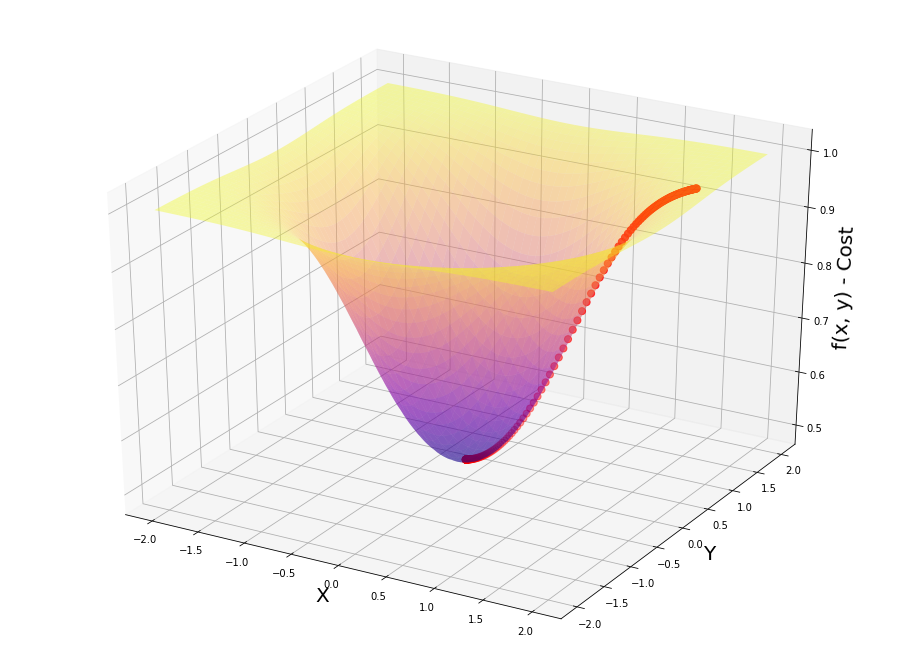

In [48]:
# Generating the 3D Plot:
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.plasma, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

In [49]:
# Advanced NumPy Array Practice:

# 1 row, 2 columns:
kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

# 2 rows, 2 columns:
hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']])
print(hs_band.shape)

# How to retrieve all elements in the first row:
print('hs_band[0]: ', hs_band[0])

# How to retrieve the element in the first row, first column, second element:
print('hs_band[0][1]: ', hs_band[0][1])

# Challenge: retrieve the 'Questlove' element:
print('hs_band[1][0]: ', hs_band[1][0]) # first element in the second row

# Alternative array building method:
the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)

# Slicing arrays:
print('Printing nicknames...', the_roots[:, 0])

# Adding an element, and slicing again:
the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print('Printing band roles ...', the_roots[:, 1])

(1, 2)
(2, 2)
hs_band[0]:  ['Black Thought' 'MC']
hs_band[0][1]:  MC
hs_band[1][0]:  Questlove
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames... ['Black Thought' 'Questlove' 'Captain']
Printing band roles ... ['MC' 'Drums' 'Guitar' 'MC']


Introduction to Mean Squared Error (MSE):

# Example 5 - Working with Data & Real Cost Functions

## Mean Squared Error: a cost function for regression problems:

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$

### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$

$$OR:$$

### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

Transposing and Reshaping Arrays:

In [61]:
# Make sample data:
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

# All data have one dimension with 7 values (7,), until they are transposed or reshaped:

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [62]:
# Fit a linear regression to the sample data:
regr  = LinearRegression()
regr.fit(x_5, y_5)
print('Intercept - Theta 0:', regr.intercept_[0])
print('Slope - Theta 1:', regr.coef_[0][0])

Intercept - Theta 0: 0.8475351486029536
Slope - Theta 1: 1.2227264637835915


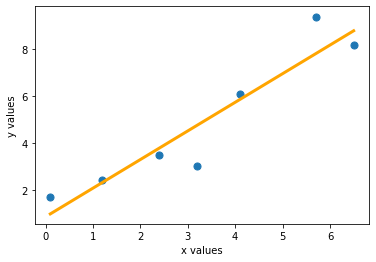

In [64]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

Implementing a Cost Function:

In [68]:
# y_hat = theta0 + theta1*x
y_hat = 0.8475351486029536 + 1.2227264637835915*x_5
print('Estimated values y_hat are: \n', y_hat)
print('Cf., the actual y values are: \n', y_5)

Estimated values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
Cf., the actual y values are: 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [75]:
# Challenge: Write a Python function mse(y, y_hat) returning the MSE. 
# Call the mse(y, y_hat) function and print out the MSE for the y_hat calculated above.

def mse(y, y_hat):
#     mse_calc = 1/7 * sum((y - y_hat)**2)
#     mse_calc = 1/y.size * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [79]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is:', mean_squared_error(y_5, y_hat))
print('MSE regression is:', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is: 0.9479655759794577
MSE regression is: 0.9479655759794577


## 3D Plot for the MSE Cost Function

Understanding Nested Loops and Plotting the MSE Function - Part 1:

### Make data for thetas:

In [95]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

In [83]:
# Nested loop practice:
for i in range(3):
    for j in range(3):
        print('Hello')

Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello


In [84]:
# How did the loop execute?
for i in range(3):
    for j in range(3):
        print(f'value of i is {i} and j is {j}')

value of i is 0 and j is 0
value of i is 0 and j is 1
value of i is 0 and j is 2
value of i is 1 and j is 0
value of i is 1 and j is 1
value of i is 1 and j is 2
value of i is 2 and j is 0
value of i is 2 and j is 1
value of i is 2 and j is 2


inner loop (j) loops through, until done, then back up to next step of loop in i, looping through all j's...until all i loops done.

### Calculate the MSE using nested For loops:

Plotting the MSE on a Surface - Part 2:

In [96]:
plot_cost = np.zeros((nr_thetas, nr_thetas))
# plot_cost
for i in range(nr_thetas):
    for j in range(nr_thetas):
#         print(plot_t0[i][j])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0:', plot_t0.shape)
print('Shape of plot_t1:', plot_t1.shape)
print('Shape of plot_cost:', plot_cost.shape)

Shape of plot_t0: (200, 200)
Shape of plot_t1: (200, 200)
Shape of plot_cost: (200, 200)


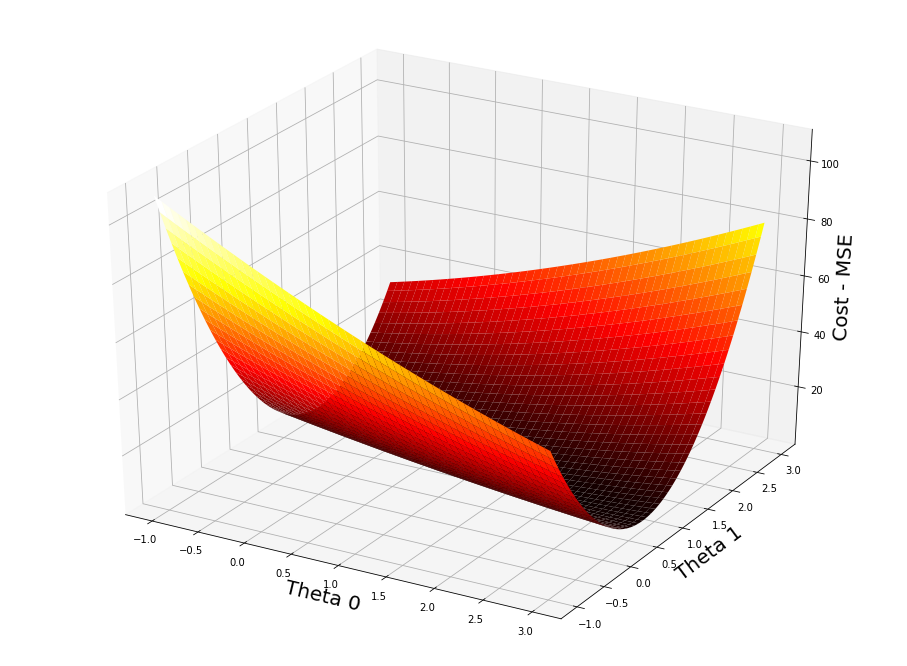

In [98]:
# Plotting MSE:
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [102]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for theta0 at plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for theta1 at plot_t1[111][91]', plot_t1[111][91])

Min value of plot_cost 0.9483826526747164
Min occurs at (i,j): (111, 91)
Min MSE for theta0 at plot_t0[111][91] 0.829145728643216
Min MSE for theta1 at plot_t1[111][91] 1.2311557788944723
